In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
import fileinput
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## PART 1 - DATA PRE-PROCESSING

- Clean and prepare the data. Remember to treat data issues, perform feature scaling, encoding and any other relevant transformations.
- If applicable, use dimensionality reduction and discuss how it impacts the clusters.
- Explain your data preparation process.

The data for this study was obtained from the Kaggle challenge named "Credit Card Dataset for Clustering". The dataset summarizes the usage behavior of approximately 9000 active credit cardholders during the last six months and is at the customer level with 18 behavioral variables. The data dictionary for the Credit Card dataset includes variables is:

- CUSTID: This is the identification number assigned to each Credit Cardholder. It is a categorical variable.

- BALANCE: This refers to the remaining balance in the cardholder's account that can be used for making purchases.

- BALANCEFREQUENCY: This is a score between 0 and 1 that indicates how frequently the balance is updated. A score of 1 means the balance is frequently updated while a score of 0 indicates infrequent updates.

- PURCHASES: This is the total amount of purchases made from the account.

- ONEOFFPURCHASES: Maximum amount of purchase made in a single transaction.

- INSTALLMENTSPURCHASES: This indicates the number of purchases made in installments.

- CASH ADVANCE: This is the amount of cash in advance given by the user.

- PURCHASESFREQUENCY: This is a score between 0 and 1 that indicates how frequently purchases are made from the account. A score of 1 means frequent purchases while a score of 0 indicates infrequent purchases.

- ONEOFFPURCHASESFREQUENCY: This is a score between 0 and 1 that indicates how frequently one-off purchases are made. A score of 1 means frequent one-off purchases while a score of 0 indicates infrequent one-off purchases.

- PURCHASES INSTALLMENTS FREQUENCY: This is a score between 0 and 1 that indicates how frequently purchases in installments are made. A score of 1 means frequent installment purchases while a score of 0 indicates infrequent installment purchases.

- CASHADVANCEFREQUENCY: This is a score between 0 and 1 that indicates how frequently cash in advance is being paid back.

- CASHADVANCETRX: This refers to the number of transactions made with "Cash in Advance".

- PURCHASESTRX: This is the number of purchase transactions made.

- CREDIT LIMIT: This is the credit limit assigned to the user's Credit Card.

- PAYMENTS: This is the total amount of payment made by the user.

- MINIMUM_PAYMENTS: This is the minimum amount of payment made by the user.

- PRCFULLPAYMENT: This indicates the percentage of full payment made by the user.

- TENURE: This is the tenure of the credit card service for the user.


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/Customer_Data.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Feature Scaling

In [12]:
# Exclude non-numeric columns before filling missing values
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

# Proceed with scaling and clustering
features = df[numeric_features]  # Only keep numeric columns for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Clustering
kmeans = KMeans(n_clusters=4)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

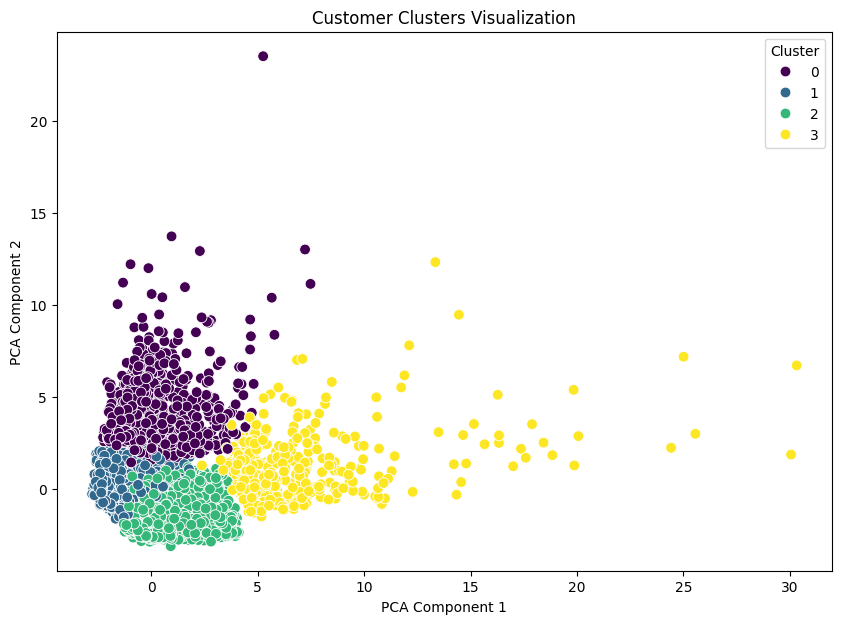

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Preprocessing
# Drop the non-numeric column 'CUST_ID'
df_cleaned = df.drop(['CUST_ID'], axis=1)

# Handle missing values by imputing with mean
df_cleaned = df_cleaned.fillna(df_cleaned.mean())

# Step 2: Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Step 3: Clustering using K-Means
# Determine the optimal number of clusters using the elbow method (optional)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Step 4: Visualization using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df, s=60)
plt.title('Customer Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

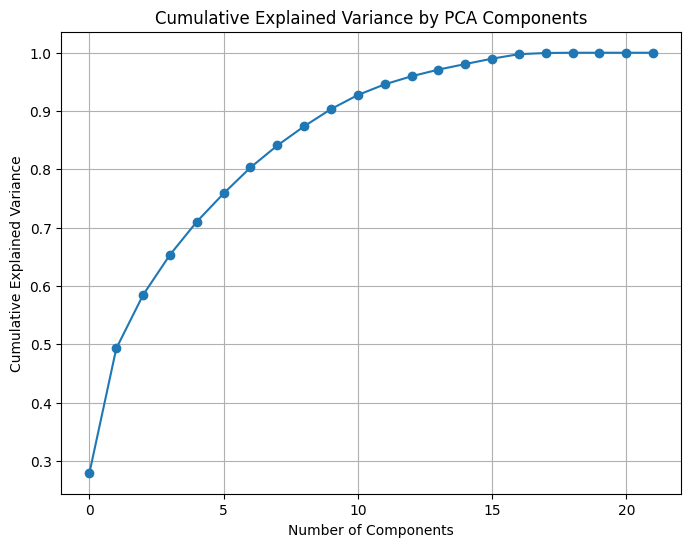

In [27]:
df_cleaned = df.drop(['CUST_ID'], axis=1)

# Ensure all columns are numeric
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Handle missing values by imputing with mean
df_cleaned = df_cleaned.fillna(df_cleaned.mean())

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Apply PCA
pca = PCA().fit(scaled_data)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

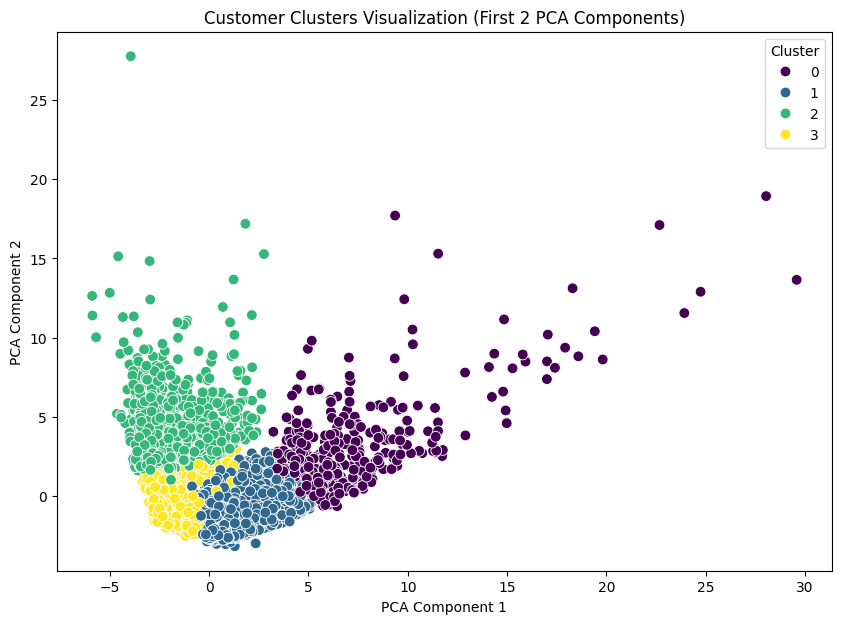

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Preprocessing (assuming df_cleaned is prepared as before)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Step 2: Apply PCA to reduce dimensions
pca = PCA(n_components=10)  # Adjust to the number of components explaining ~90% variance
pca_data = pca.fit_transform(scaled_data)

# Step 3: Clustering using K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Step 4: Visualization using the first 2 PCA components
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='viridis', s=60)
plt.title('Customer Clusters Visualization (First 2 PCA Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [15]:
df['TENURE'].value_counts()

TENURE
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: count, dtype: int64

In [17]:
df['PRC_FULL_PAYMENT'].value_counts()

PRC_FULL_PAYMENT
0.000000    5903
1.000000     488
0.083333     426
0.166667     166
0.500000     156
0.250000     156
0.090909     153
0.333333     134
0.100000      94
0.200000      83
0.666667      78
0.916667      77
0.181818      75
0.750000      68
0.833333      63
0.111111      61
0.142857      54
0.125000      52
0.416667      44
0.400000      42
0.300000      40
0.454545      36
0.272727      35
0.800000      33
0.363636      32
0.583333      31
0.600000      28
0.545455      27
0.636364      26
0.285714      24
0.727273      22
0.222222      20
0.909091      19
0.714286      19
0.777778      19
0.875000      18
0.444444      17
0.818182      17
0.900000      16
0.428571      14
0.571429      14
0.375000      13
0.857143      12
0.700000      12
0.888889      12
0.555556      12
0.625000       9
Name: count, dtype: int64

## PART 2 - EXPLORATORY DATA ANALYSIS (EDA)

- Perform an EDA to understand the data and identify patterns that could inform the clustering.
- Explain your findings

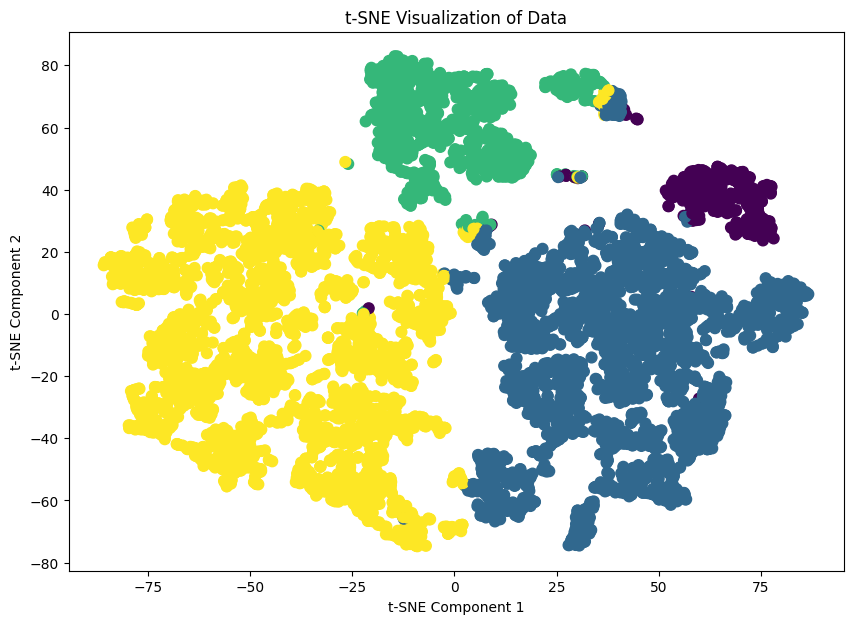

In [30]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

plt.figure(figsize=(10, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=clusters, cmap='viridis', s=60)
plt.title('t-SNE Visualization of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [31]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.2348788438326562


## PART 3 - CLUSTERING ALGORITHMS

- Implement at least three different clustering algorithms of your choice (e.g., K-Means, Hierarchical, DBSCAN). You can try any algorithms available in sklearn.
- Use Elbow method, Silhouette analysis, or other techniques to determine the optimal number of clusters.
- Discuss each method, and select the most appropriate

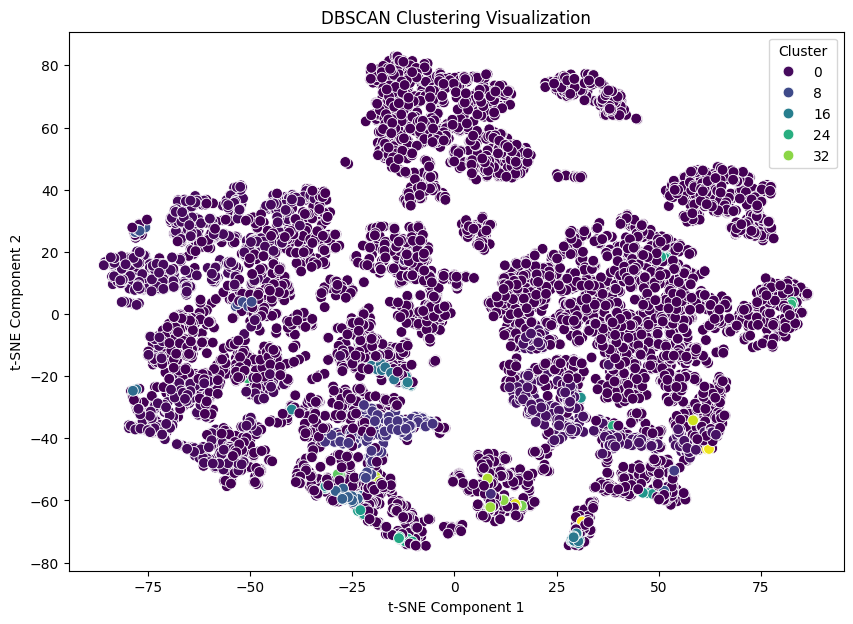

In [32]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `scaled_data` is already prepared
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add DBSCAN cluster labels to the dataframe
df['DBSCAN_Cluster'] = dbscan_labels

# Visualization using t-SNE (or PCA if you prefer)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=dbscan_labels, palette='viridis', s=60)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

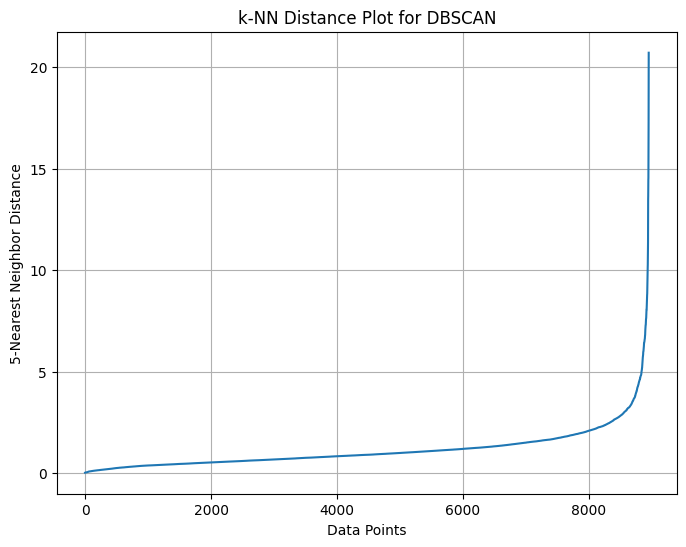

In [34]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Set min_samples (e.g., 5)
min_samples = 5

# Compute k-nearest neighbors
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

# Sort and plot k-distance
distances = np.sort(distances[:, min_samples-1])
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('k-NN Distance Plot for DBSCAN')
plt.xlabel('Data Points')
plt.ylabel(f'{min_samples}-Nearest Neighbor Distance')
plt.grid(True)
plt.show()

In [35]:
from sklearn.metrics import silhouette_score

# Try different eps and min_samples combinations
for eps in [0.3, 0.5, 0.7]:
    for min_samples in [3, 5, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_data)
        if len(set(labels)) > 1:  # Avoid evaluating a single cluster
            score = silhouette_score(scaled_data, labels)
            print(f'eps: {eps}, min_samples: {min_samples}, Silhouette Score: {score}')

eps: 0.3, min_samples: 3, Silhouette Score: -0.4847102647706154
eps: 0.3, min_samples: 5, Silhouette Score: -0.44066582515868097
eps: 0.3, min_samples: 10, Silhouette Score: -0.4243286801573183
eps: 0.5, min_samples: 3, Silhouette Score: -0.49790028388346463
eps: 0.5, min_samples: 5, Silhouette Score: -0.4148788305326729
eps: 0.5, min_samples: 10, Silhouette Score: -0.2989799694152971
eps: 0.7, min_samples: 3, Silhouette Score: -0.44171607036359894
eps: 0.7, min_samples: 5, Silhouette Score: -0.39897997640172184
eps: 0.7, min_samples: 10, Silhouette Score: -0.33224722164667114


In [36]:
from sklearn.metrics import silhouette_score
import numpy as np

# Range of min_samples to test
min_samples_range = [3, 5, 7, 10, 15, 20, 25, 30]

# Fixed eps value
eps = 0.5

# Iterate over different min_samples values
best_score = -1
best_min_samples = None

print("Testing different min_samples with eps =", eps)
for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_data)
    # Only evaluate if there are more than one cluster formed
    if len(set(labels)) > 1:
        score = silhouette_score(scaled_data, labels)
        print(f'min_samples: {min_samples}, Silhouette Score: {score}')
        # Track the best score and corresponding min_samples
        if score > best_score:
            best_score = score
            best_min_samples = min_samples

print("\nBest configuration:")
print(f'eps: {eps}, min_samples: {best_min_samples}, Silhouette Score: {best_score}')

Testing different min_samples with eps = 0.5
min_samples: 3, Silhouette Score: -0.49790028388346463
min_samples: 5, Silhouette Score: -0.4148788305326729
min_samples: 7, Silhouette Score: -0.3509761203525266
min_samples: 10, Silhouette Score: -0.2989799694152971
min_samples: 15, Silhouette Score: -0.2536788716502608
min_samples: 20, Silhouette Score: -0.28107071234119463
min_samples: 25, Silhouette Score: -0.2781285795787095
min_samples: 30, Silhouette Score: -0.3115643236656435

Best configuration:
eps: 0.5, min_samples: 15, Silhouette Score: -0.2536788716502608


In [37]:
from sklearn.metrics import silhouette_score
import numpy as np

# Range of eps values to test
eps_range = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Fixed min_samples value
min_samples = 10

# Iterate over different eps values
best_score = -1
best_eps = None

print("Testing different eps with min_samples =", min_samples)
for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_data)
    # Only evaluate if there are more than one cluster formed
    if len(set(labels)) > 1:
        score = silhouette_score(scaled_data, labels)
        print(f'eps: {eps}, Silhouette Score: {score}')
        # Track the best score and corresponding eps
        if score > best_score:
            best_score = score
            best_eps = eps

print("\nBest configuration:")
print(f'eps: {best_eps}, min_samples: {min_samples}, Silhouette Score: {best_score}')

Testing different eps with min_samples = 10
eps: 0.3, Silhouette Score: -0.4243286801573183
eps: 0.4, Silhouette Score: -0.3773976716354907
eps: 0.5, Silhouette Score: -0.2989799694152971
eps: 0.6, Silhouette Score: -0.2641496064016787
eps: 0.7, Silhouette Score: -0.33224722164667114
eps: 0.8, Silhouette Score: -0.132480542622166
eps: 0.9, Silhouette Score: -0.10107637372526722
eps: 1.0, Silhouette Score: 0.012653794510549887

Best configuration:
eps: 1.0, min_samples: 10, Silhouette Score: 0.012653794510549887


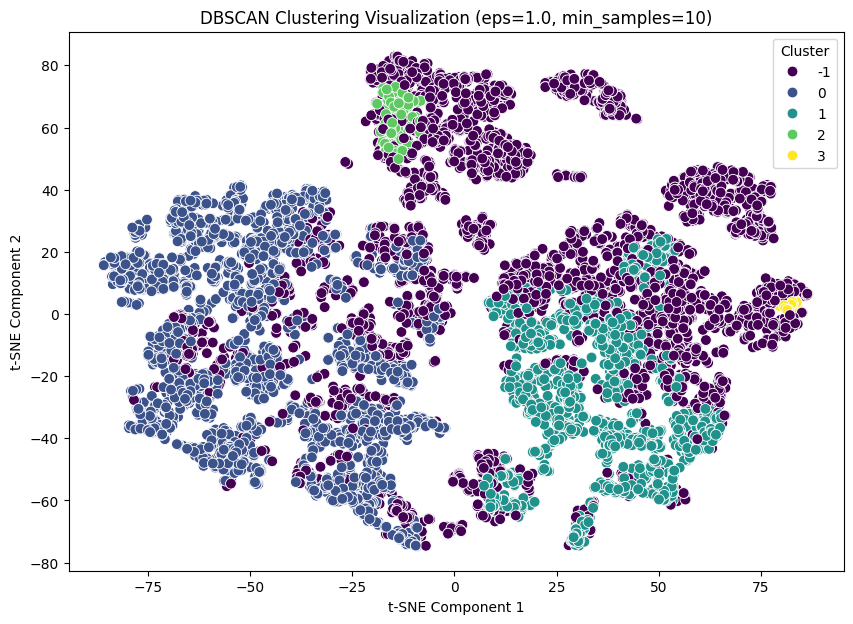

Number of clusters: 4
Number of noise points: 3819


In [38]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Apply DBSCAN with the chosen configuration
dbscan = DBSCAN(eps=1.0, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add DBSCAN cluster labels to the dataframe
df['DBSCAN_Cluster'] = dbscan_labels

# Visualization using t-SNE (assuming tsne_data is already available)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=dbscan_labels, palette='viridis', s=60)
plt.title('DBSCAN Clustering Visualization (eps=1.0, min_samples=10)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

# Print the number of clusters and noise points
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

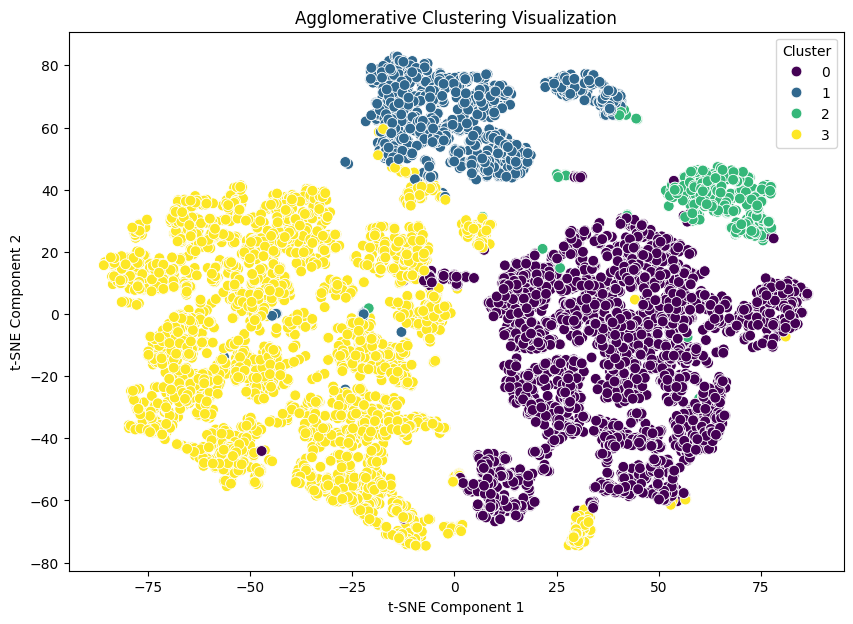

In [33]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)  # Adjust n_clusters as needed
agglo_labels = agglo.fit_predict(scaled_data)

# Add Agglomerative cluster labels to the dataframe
df['Agglomerative_Cluster'] = agglo_labels

# Visualization using t-SNE (or PCA if you prefer)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=agglo_labels, palette='viridis', s=60)
plt.title('Agglomerative Clustering Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

## PART 4 - INTERPRETING CLUSTERS

- Characterize the clusters formed: What kind of customers fall into each cluster? 
    What features are most significant in distinguishing between clusters?

## PART 5 - ACTIONABLE INSIGHTS

- Provide business recommendations based on the clusters formed. How would you target different customer segments?